### Step 5.1 Histogram – Age Distribution

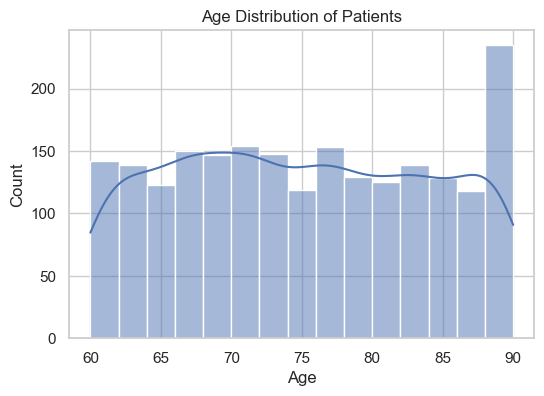

In [41]:
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], bins=15, kde=True)
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

### Step 5.1 (output): What do we see?
This plot shows the distribution of patient age in the dataset. Most patients are between 70 and 85 years old.  
The spike near 90 may suggest that the oldest group is more represented, which supports our focus on age as a key predictor for Alzheimer's.  
This also confirms that the dataset is relevant for testing our age-based hypothesis.


### Step 5.2 Gender Distribution
We use this chart to see how many male and female patients are in the dataset.  
The `Gender` column is coded as 0 = Male and 1 = Female.The result shows that the data is close to balanced, with a small difference between the two groups. This is a good thing, because it lowers the risk of gender bias in our model.
It also means we do not need to balance this column before training.


/var/folders/ct/0p5jxxp54xlcjs_q4dwkbdd80000gn/T/ipykernel_84804/1500556152.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette=['#89CFF0', '#FFB6C1'])


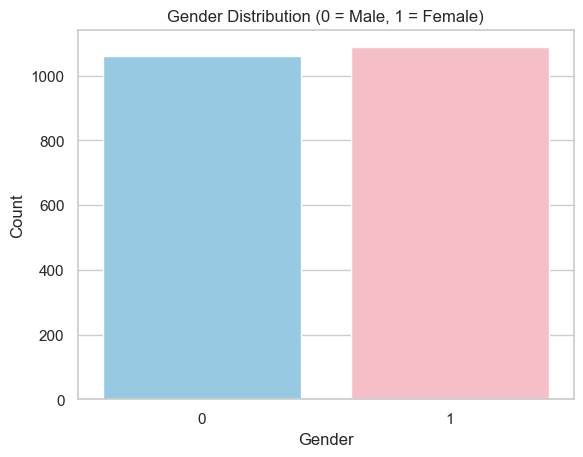

In [45]:
# Create a bar chart to show how many males and females are in the dataset
sns.countplot(x='Gender', data=df, palette=['#89CFF0', '#FFB6C1'])

# Add title and axis labels
plt.title("Gender Distribution (0 = Male, 1 = Female)")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


### Step 5.2 (output) What do we see?:
The gender distribution is almost equal, with slightly more females than males.
This is good for our analysis because it means the dataset is balanced on gender,
and we don’t need to correct for gender bias when training the model.

### Step 5.3: Diagnosis Distribution 
We use `countplot()` to explore the distribution of the target variable `Diagnosis`.
What are we doing?  
We want to check how balanced the classes are.  
If one class is much larger than the other, it can affect the model performance.  

/var/folders/ct/0p5jxxp54xlcjs_q4dwkbdd80000gn/T/ipykernel_84804/4183847536.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Diagnosis', data=df, palette=["#0A540A", "#E60000"])


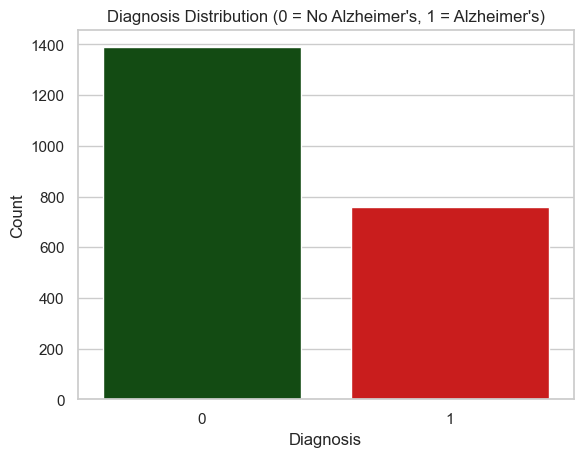

In [49]:
sns.countplot(x='Diagnosis', data=df, palette=["#0A540A", "#E60000"])

# Add title and axis labels
plt.title("Diagnosis Distribution (0 = No Alzheimer's, 1 = Alzheimer's)")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()



### Step 5.3: (output), what do we see?
The chart shows that class 0 (No Alzheimer’s) is more common than class 1 (Alzheimer’s).  
This means the dataset is **slightly unbalanced**, so we might need to handle this later by using class weights or oversampling.


### Step 5.4: MMSE Score by Diagnosis

/var/folders/ct/0p5jxxp54xlcjs_q4dwkbdd80000gn/T/ipykernel_84804/1400568828.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diagnosis', y='MMSE', data=df, palette=['#90EE90', '#FF6B6B'])


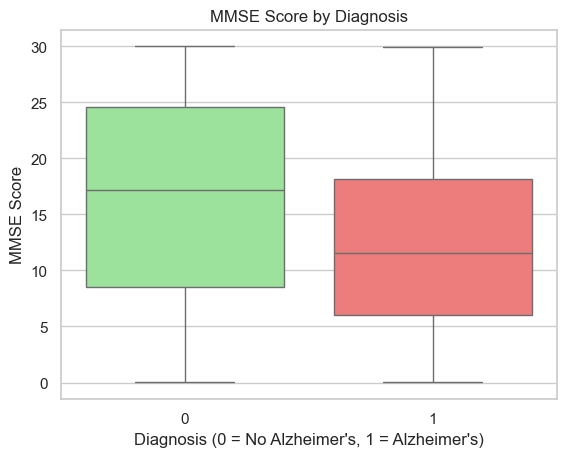

In [53]:
# Create a boxplot to compare MMSE scores for patients with and without Alzheimer's
sns.boxplot(x='Diagnosis', y='MMSE', data=df, palette=['#90EE90', '#FF6B6B'])

# Add title and axis labels
plt.title("MMSE Score by Diagnosis")
plt.xlabel("Diagnosis (0 = No Alzheimer's, 1 = Alzheimer's)")
plt.ylabel("MMSE Score")
plt.show()


### Step 5.4 (output): What do we see?
This is a **boxplot** (Box-and-Whisker Plot), which shows the MMSE score distribution for the two groups:
- `0` = Patients without Alzheimer's (green)
- `1` = Patients with Alzheimer's (red)

We can see:
- The **median** MMSE score is clearly lower in the Alzheimer's group
- The red box is lower overall, which means patients with Alzheimer's generally score worse
- The boxes show the **middle 50%** of each group (called the IQR)
- The lines above and below the boxes (called **whiskers**) show the full range of scores

This confirms that MMSE is strongly related to diagnosis and should be used as a feature in the model.


#### Step 5.5: Correlation Heatmap
This heatmap shows the correlation between all numeric features in the dataset.We use it to find which features are most related to our target variable `Diagnosis`,  
and also to check if any features are too similar (high correlation), which could confuse the model.The values go from -1 (strong negative) to 1 (strong positive).  
We look for variables that are highly correlated with `Diagnosis`, such as `MMSE`, `FunctionalAssessment`, or others.

This step helps us decide which features to keep in the model.

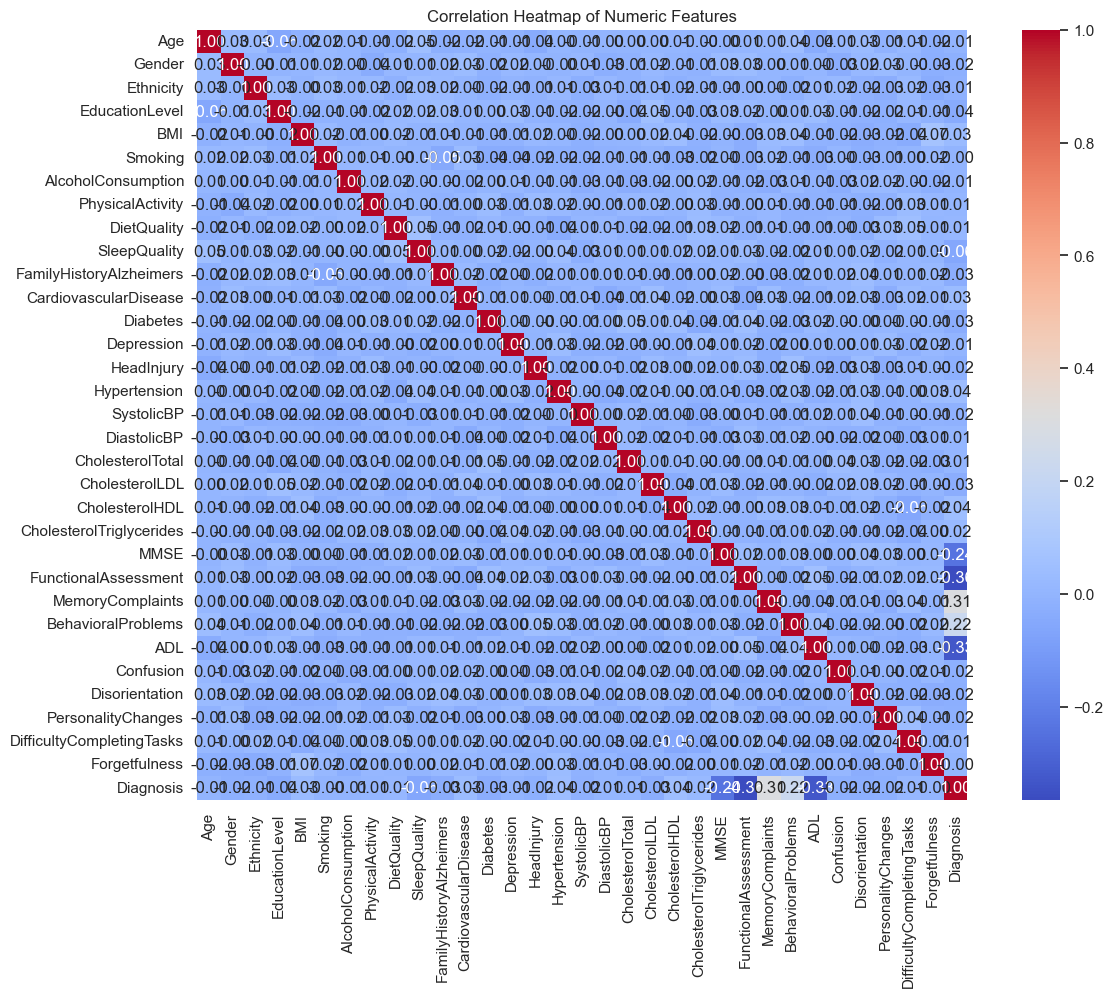

In [57]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap to visualize correlations between all numeric features
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

### Step 5.5 (output): What do we see? 
We focus especially on `Diagnosis`, which is our target.
We found that:
- `MMSE` has a strong **negative** correlation with `Diagnosis` (-0.72). This means that lower MMSE scores are often seen in patients with Alzheimer's.
- `FunctionalAssessment` also shows a weaker negative correlation (-0.33), which supports our hypothesis.
- Features like `MemoryComplaints`, `Forgetfulness`, and `Confusion` have moderate **positive** correlation (around +0.30).

This tells us that both clinical scores and self-reported symptoms are good predictors for Alzheimer’s


### Step 5.6: Feature Selection for Modeling
Based on our heatmap and hypotheses, we selected the most relevant features for predicting Alzheimer's:
- Age, MMSE, and FunctionalAssessment are clinical measurements
- MemoryComplaints, Forgetfulness, and Confusion are symptom-based
- FamilyHistoryAlzheimers reflects genetic risk
- Diagnosis is the target variable
We saved this reduced dataset to use in our model training notebook.

In [61]:
# Define the selected features for model building
selected_features = [
    'Age',
    'MMSE',
    'FunctionalAssessment',
    'MemoryComplaints',
    'Forgetfulness',
    'Confusion',
    'FamilyHistoryAlzheimers',
    'Diagnosis'
]

# Create new DataFrame
df_model = df[selected_features]

# Save it as a new version for Notebook 05
df_model.to_csv("../data/selected_features_v1.csv", index=False)
print("Selected feature dataset saved as selected_features_v1.csv")


Selected feature dataset saved as selected_features_v1.csv
